In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image, ImageDraw
import random

In [8]:
train = pd.read_csv('C:/Users/sahil/OneDrive/Desktop/Barrierreef/Dataset/labels/train.csv')
test = pd.read_csv('C:/Users/sahil/OneDrive/Desktop/Barrierreef/Dataset/labels/test.csv')
#sample_submission = pd.read_csv('../input/tensorflow-great-barrier-reef/example_sample_submission.csv')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        261 non-null    int64 
 1   sequence        261 non-null    int64 
 2   video_frame     261 non-null    int64 
 3   sequence_frame  261 non-null    int64 
 4   image_id        261 non-null    object
 5   annotations     261 non-null    object
dtypes: int64(4), object(2)
memory usage: 12.4+ KB


In [10]:
train.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
0,0,40258,0,0,0-0,[]
1,0,40258,1,1,0-1,[]
2,0,40258,2,2,0-2,[]
3,0,40258,3,3,0-3,[]
4,0,40258,4,4,0-4,[]


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        52 non-null     int64 
 1   sequence        52 non-null     int64 
 2   video_frame     52 non-null     int64 
 3   sequence_frame  52 non-null     int64 
 4   image_id        52 non-null     object
 5   annotations     52 non-null     object
dtypes: int64(4), object(2)
memory usage: 2.6+ KB


In [12]:
test.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations
0,0,40258,209,209,0-209,[]
1,0,40258,210,210,0-210,[]
2,0,40258,211,211,0-211,[]
3,0,40258,212,212,0-212,[]
4,0,40258,213,213,0-213,[]


In [ ]:
#visualization

In [41]:
df_train = train.copy()
train_dir = "C:/Users/sahil/OneDrive/Desktop/Barrierreef/Dataset/images/train"
df_train['image_path'] = train_dir +"/" + df_train['video_frame'].astype(str) + ".jpg"
df_train.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path
0,0,40258,0,0,0-0,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
1,0,40258,1,1,0-1,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
2,0,40258,2,2,0-2,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
3,0,40258,3,3,0-3,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
4,0,40258,4,4,0-4,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...


In [42]:
df_train['video_id'].value_counts()

0    261
Name: video_id, dtype: int64

<BarContainer object of 1 artists>

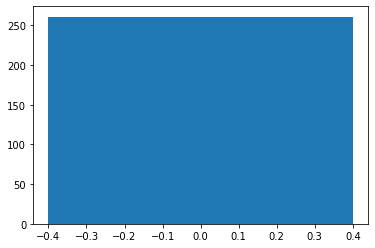

In [43]:
plt.bar(x = df_train['video_id'].value_counts().index, height = df_train['video_id'].value_counts())

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   video_id        261 non-null    int64 
 1   sequence        261 non-null    int64 
 2   video_frame     261 non-null    int64 
 3   sequence_frame  261 non-null    int64 
 4   image_id        261 non-null    object
 5   annotations     261 non-null    object
 6   image_path      261 non-null    object
dtypes: int64(4), object(3)
memory usage: 14.4+ KB


In [45]:
num_training_images = len(df_train)
num_training_images

261

In [46]:
df_train.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path
0,0,40258,0,0,0-0,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
1,0,40258,1,1,0-1,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
2,0,40258,2,2,0-2,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
3,0,40258,3,3,0-3,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
4,0,40258,4,4,0-4,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...


C:/Users/sahil/OneDrive/Desktop/Barrierreef/Dataset/images/train/87.jpg
C:/Users/sahil/OneDrive/Desktop/Barrierreef/Dataset/images/train/184.jpg
C:/Users/sahil/OneDrive/Desktop/Barrierreef/Dataset/images/train/82.jpg
C:/Users/sahil/OneDrive/Desktop/Barrierreef/Dataset/images/train/57.jpg
C:/Users/sahil/OneDrive/Desktop/Barrierreef/Dataset/images/train/193.jpg
C:/Users/sahil/OneDrive/Desktop/Barrierreef/Dataset/images/train/72.jpg


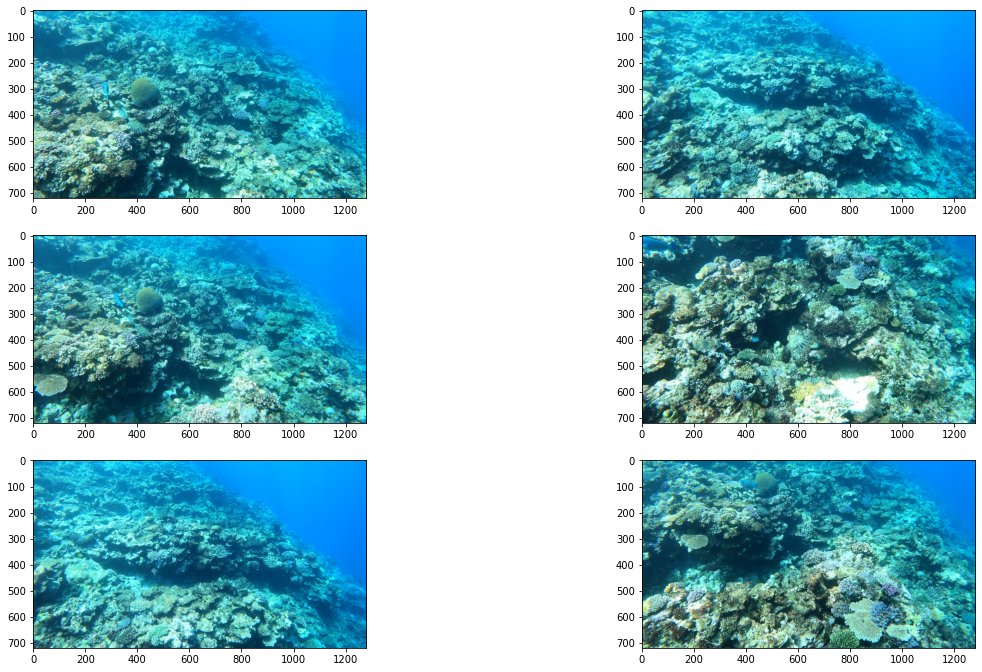

In [47]:
plt.figure(figsize = (20, 20))
for i in range(0, 6):
    plt.subplot(5, 2, i+1)
    index = random.randint(0, 208)
    img_path = df_train['image_path'].iloc[index]
    print(img_path)
    img = Image.open(img_path)
    plt.imshow(img)

In [48]:
df_train_annotated = df_train[df_train['annotations'] != '[]']
df_train_annotated

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path
16,0,40258,16,16,0-16,"[{'x': 559, 'y': 213, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
17,0,40258,17,17,0-17,"[{'x': 558, 'y': 213, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
18,0,40258,18,18,0-18,"[{'x': 557, 'y': 213, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
19,0,40258,19,19,0-19,"[{'x': 556, 'y': 214, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
20,0,40258,20,20,0-20,"[{'x': 555, 'y': 214, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
...,...,...,...,...,...,...,...
256,0,40258,256,256,0-256,"[{'x': 920, 'y': 319, 'width': 37, 'height': 35}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
257,0,40258,257,257,0-257,"[{'x': 926, 'y': 326, 'width': 37, 'height': 35}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
258,0,40258,258,258,0-258,"[{'x': 933, 'y': 333, 'width': 37, 'height': 35}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...
259,0,40258,259,259,0-259,"[{'x': 939, 'y': 341, 'width': 37, 'height': 36}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...


In [49]:
(len(df_train_annotated)/ num_training_images) * 100

73.9463601532567

In [50]:
df_train['No_bbox'] = df_train['annotations'].apply(lambda x:x.count('{'))
df_train.head()

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path,No_bbox
0,0,40258,0,0,0-0,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,0
1,0,40258,1,1,0-1,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,0
2,0,40258,2,2,0-2,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,0
3,0,40258,3,3,0-3,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,0
4,0,40258,4,4,0-4,[],C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,0


In [51]:
df_train['No_bbox'].value_counts()

1    163
0     68
2     30
Name: No_bbox, dtype: int64

<AxesSubplot:xlabel='No_bbox', ylabel='count'>

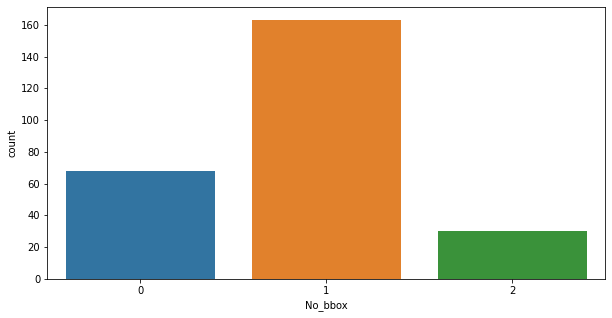

In [52]:
plt.figure(figsize = (10,5))
sns.countplot(x = df_train['No_bbox'])

In [53]:
df_train_annotated['No_bbox'] = df_train_annotated['annotations'].apply(lambda x:x.count('{'))
df_train_annotated.head()

<ipython-input-53-8cb41bd96520>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_annotated['No_bbox'] = df_train_annotated['annotations'].apply(lambda x:x.count('{'))


,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path,No_bbox
16,0,40258,16,16,0-16,"[{'x': 559, 'y': 213, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1
17,0,40258,17,17,0-17,"[{'x': 558, 'y': 213, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1
18,0,40258,18,18,0-18,"[{'x': 557, 'y': 213, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1
19,0,40258,19,19,0-19,"[{'x': 556, 'y': 214, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1
20,0,40258,20,20,0-20,"[{'x': 555, 'y': 214, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1


In [58]:
df_train_annotated[df_train_annotated['No_bbox'] > 0]

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path,No_bbox
16,0,40258,16,16,0-16,"[{'x': 559, 'y': 213, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1
17,0,40258,17,17,0-17,"[{'x': 558, 'y': 213, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1
18,0,40258,18,18,0-18,"[{'x': 557, 'y': 213, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1
19,0,40258,19,19,0-19,"[{'x': 556, 'y': 214, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1
20,0,40258,20,20,0-20,"[{'x': 555, 'y': 214, 'width': 50, 'height': 32}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1
...,...,...,...,...,...,...,...,...
256,0,40258,256,256,0-256,"[{'x': 920, 'y': 319, 'width': 37, 'height': 35}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1
257,0,40258,257,257,0-257,"[{'x': 926, 'y': 326, 'width': 37, 'height': 35}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1
258,0,40258,258,258,0-258,"[{'x': 933, 'y': 333, 'width': 37, 'height': 35}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1
259,0,40258,259,259,0-259,"[{'x': 939, 'y': 341, 'width': 37, 'height': 36}]",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,1


In [59]:
df_train_annotated[df_train_annotated['No_bbox'] >1]

,video_id,sequence,video_frame,sequence_frame,image_id,annotations,image_path,No_bbox
35,0,40258,35,35,0-35,"[{'x': 520, 'y': 151, 'width': 78, 'height': 6...",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,2
36,0,40258,36,36,0-36,"[{'x': 520, 'y': 148, 'width': 80, 'height': 6...",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,2
37,0,40258,37,37,0-37,"[{'x': 521, 'y': 144, 'width': 82, 'height': 6...",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,2
38,0,40258,38,38,0-38,"[{'x': 522, 'y': 141, 'width': 83, 'height': 6...",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,2
39,0,40258,39,39,0-39,"[{'x': 521, 'y': 139, 'width': 85, 'height': 6...",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,2
40,0,40258,40,40,0-40,"[{'x': 521, 'y': 138, 'width': 87, 'height': 7...",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,2
41,0,40258,41,41,0-41,"[{'x': 521, 'y': 138, 'width': 89, 'height': 7...",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,2
42,0,40258,42,42,0-42,"[{'x': 521, 'y': 139, 'width': 91, 'height': 7...",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,2
43,0,40258,43,43,0-43,"[{'x': 523, 'y': 134, 'width': 92, 'height': 7...",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,2
44,0,40258,44,44,0-44,"[{'x': 524, 'y': 139, 'width': 94, 'height': 8...",C:/Users/sahil/OneDrive/Desktop/Barrierreef/Da...,2


In [60]:
import ast

ast.literal_eval(df_train_annotated.iloc[50].annotations)

[{'x': 451, 'y': 53, 'width': 57, 'height': 57},
 {'x': 504, 'y': 659, 'width': 141, 'height': 60}]

In [61]:
def visualize_img_annots(df, id):
    img_path = df['image_path'][id]
    img = Image.open(img_path)
    bounding_boxes = ast.literal_eval(df['annotations'].loc[id])
    for box in bounding_boxes:
            shape = (box['x'], box['y'], box['x']+box['width'], box['y']+box['height'])
            ImageDraw.Draw(img).rectangle(shape, outline=180, width=3)
    display(img)

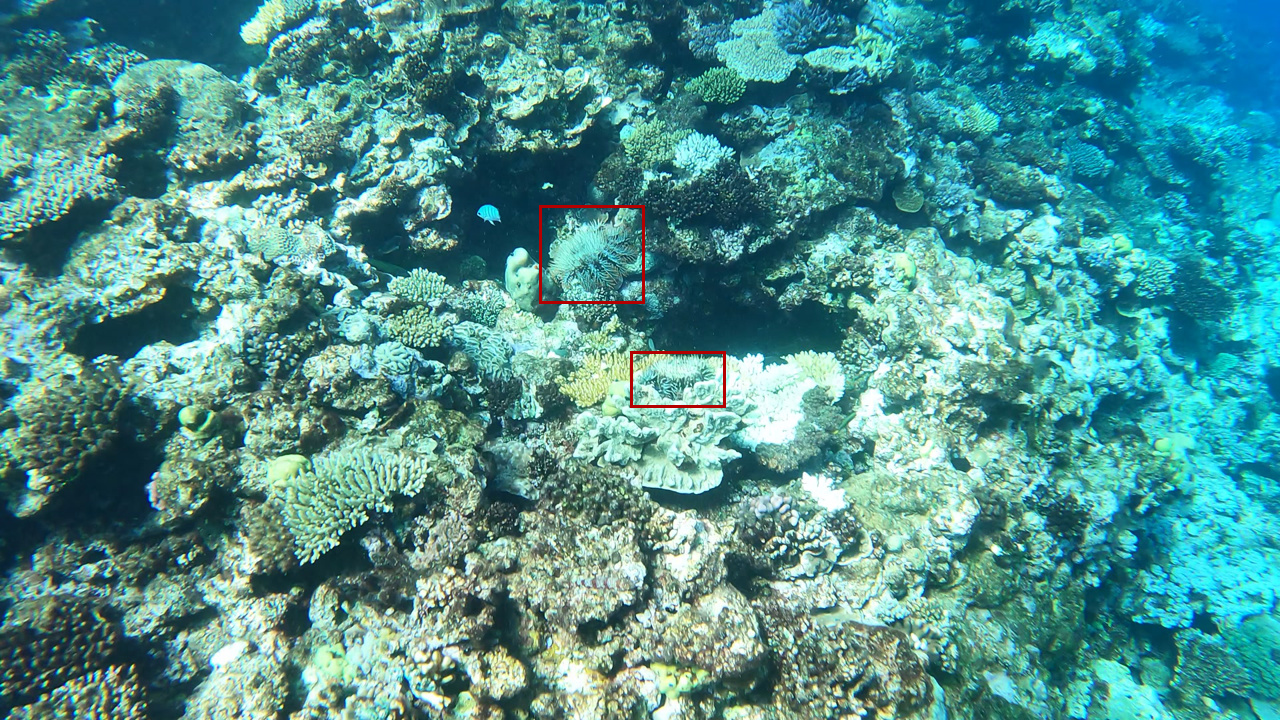

In [62]:
visualize_img_annots(df_train_annotated, id = 50)